### [Finished] Framework for Negotiation with DRL method under gym environment
`https://github.com/YueNing/tn_source_code.git`

###  [Finished] Learned acceptance network and offer network

1. [IMRPOVEMENT]: Acceptance Strategy [Finshed] [Single Issue, Multi issues]

    * observation_space = [opponent_offer, time]
    * action_space = Box.Discrete(3)
        - ResponseType.ACCEPT,  
        - ResponseType.Wait 
        - ResponseType.REJECT_OFFER

2. [IMPROEMENT]: Offer Strategy  [Finshed] [Single Issue and Multi issues]

    * observation_space = [opponent_offer, time] normalization between [-1, 1]
    * action_space = all of outcomes, normalization [-1, 1]

### Code example:

In [6]:
!pip install negmas==0.7.0
!pip install scml==0.3.0
!pip install gym==0.17.2
# Before install stable_baselines Need to install libopenmpi-dev: command 'sudo apt install libopenmpi-dev'
!pip install mpi4py==3.0.3
!pip install stable_baselines==2.10.0
!pip install tensorflow==1.15.3
!pip install -i https://test.pypi.org/simple/ drl-negotiation

  Using cached scml-0.3.0-py2.py3-none-any.whl (354 kB)
  Using cached PuLP-2.4-py3-none-any.whl (40.6 MB)
     |████████████████████████████████| 364 kB 8.6 MB/s eta 0:00:01
  Using cached python_constraint-1.4.0-py2.py3-none-any.whl
     |████████████████████████████████| 280 kB 11.1 MB/s eta 0:00:01


  Using cached sortedcontainers-2.3.0-py2.py3-none-any.whl (29 kB)


  Using cached amply-0.1.4-py3-none-any.whl (16 kB)
     |████████████████████████████████| 575 kB 8.5 MB/s eta 0:00:01
  Using cached py-1.10.0-py2.py3-none-any.whl (97 kB)
  Using cached iniconfig-1.1.1-py2.py3-none-any.whl (5.0 kB)
  Using cached pluggy-0.13.1-py2.py3-none-any.whl (18 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)


Looking in indexes: https://test.pypi.org/simple/


#### Using DQN to train the Acceptance Strategy of MyDRLNegotiator, competite with the MyOpponentNegotiator

Logging to train_negotiation_DQN
--------------------------------------
| % time spent exploring  | 98       |
| episodes                | 100      |
| mean 100 episode reward | -0.2     |
| steps                   | 232      |
--------------------------------------
--------------------------------------
| % time spent exploring  | 97       |
| episodes                | 200      |
| mean 100 episode reward | 0        |
| steps                   | 485      |
--------------------------------------
--------------------------------------
| % time spent exploring  | 96       |
| episodes                | 300      |
| mean 100 episode reward | 0.1      |
| steps                   | 736      |
--------------------------------------
--------------------------------------
| % time spent exploring  | 95       |
| episodes                | 400      |
| mean 100 episode reward | 0.3      |
| steps                   | 993      |
--------------------------------------
-------------------------------

--------------------------------------
| % time spent exploring  | 45       |
| episodes                | 3600     |
| mean 100 episode reward | 2        |
| steps                   | 11212    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 43       |
| episodes                | 3700     |
| mean 100 episode reward | 2.1      |
| steps                   | 11612    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 40       |
| episodes                | 3800     |
| mean 100 episode reward | 2.9      |
| steps                   | 12086    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 38       |
| episodes                | 3900     |
| mean 100 episode reward | 2.6      |
| steps                   | 12549    |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 7200     |
| mean 100 episode reward | 45.3     |
| steps                   | 145416   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 7300     |
| mean 100 episode reward | 48.2     |
| steps                   | 151109   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 7400     |
| mean 100 episode reward | 43.1     |
| steps                   | 156193   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 7500     |
| mean 100 episode reward | 39.1     |
| steps                   | 160794   |
--------------------------------------
--------------------------------------
| % time spent exploring 

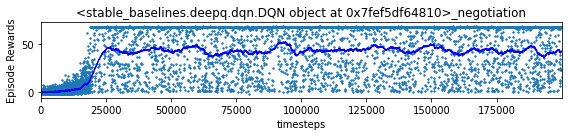

In [11]:
from drl_negotiation.env import NegotiationEnv
from drl_negotiation.utils import generate_config, genearate_observation_space
from drl_negotiation.game import NegotiationGame
from drl_negotiation.negotiator import MyDRLNegotiator, MyOpponentNegotiator
from drl_negotiation.utility_functions import MyUtilityFunction
from drl_negotiation.train import train_negotiation

config = generate_config(n_issues=1)

game = NegotiationGame(
    name="negotiation_game",
    game_type="DRLNegotiation",
    issues=config.get("issues"),
    competitors=[
        MyDRLNegotiator(
            name="my_drl_negotiator",
            ufun=MyUtilityFunction(weights=config.get("weights")[0]),
            init_proposal=False,
        ),
        MyOpponentNegotiator(
            name="my_opponent_negotiator",
            ufun=MyUtilityFunction(weights=config.get("weights")[1])
        )
    ],
    n_steps=config.get("n_steps")
)
env = NegotiationEnv(
        name="negotiation_env_ac_s",
        strategy="ac_s",
        game=game,
        observation_space=genearate_observation_space(config),
        action_space=3
    )

plot = True

game.set_env(env=env)
model = "DQN"
done, _ = train_negotiation(plot=plot, model=model, num_timesteps=200000, env=env, monitor=False)
assert done,  f'train false by the model {model}'

print('Finished!')

'3.7.10 (default, Feb 26 2021, 18:47:35) \n[GCC 7.3.0]'

In [10]:
from drl_negotiation.utils import generate_action_space
env =  NegotiationEnv(
     name="negotiation_env_of_s",
     strategy="of_s",
     game=game,
     observation_space=genearate_observation_space(config),
     # action_space=[[config.get("issues")[0].values[0], ], [config.get("issues")[0].values[1], ]]
     # action_space=[[-1, ], [1, ]]
     action_space = generate_action_space(config)
)
game.set_env(env=env)
model = "PPO1"
done, _ = train_negotiation(plot=plot, model=model, env=env, monitor=False)
assert done,  f'train false by the model {model}'

Logging to train_negotiation_PPO1


********** Iteration 0 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00595 |      -0.01420 |       1.91043 |       0.00030 |       1.42033
     -0.02171 |      -0.01423 |       1.75093 |       0.00297 |       1.42349
     -0.03408 |      -0.01426 |       1.75034 |       0.01030 |       1.42603
     -0.04310 |      -0.01428 |       1.76366 |       0.02520 |       1.42807
Evaluating losses...
     -0.04480 |      -0.01429 |       1.75554 |       0.03764 |       1.42923
----------------------------------
| EpLenMean       | 6.15         |
| EpRewMean       | 1.02         |
| EpThisIter      | 39           |
| EpisodesSoFar   | 39           |
| TimeElapsed     | 0.583        |
| TimestepsSoFar  | 256          |
| ev_tdlam_before | 0.00744      |
| loss_ent        | 1.4292327    |
| loss_kl         | 0.037637867  |
| loss_pol_entpen | -0.014292327 |
| loss_pol_surr   | -0.04479905  |
| los

### Example result shown in tensorboard

Episode reward: The reward of Acceptance strategy  and offer/bidding strategy is increasing.


#### SIgnle issue, acceptance strategy, episode reward, dqn(blue line) and ppo1(pink line)

![single issue](./single_issue_negotiation/ac_s_dqn_ppo1_EpRe.svg)

#### SIgnle issue, offer/bidding strategy, episode reward, ppo1

![single issue](./single_issue_negotiation/of_s_ppo1_EpRe.svg)

The basic environment of negotiation with method deep reinforcement learning has been implemented!

The future work is about implementing a scml environment as similar as negotiation environment.

Due to the many ideas of improvement of agents in scml. can not try all parts.
The future work (myagent in scml) is mainly in **negotiation manager** and **negotiation algorithm**.